# Checkers full code

1) Checkers action space
2) referee for legal moves
3) game baseline working om random picks
4) basic python visualization output

# Input 

In [1]:
#used libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mlxtend.plotting import checkerboard_plot
from colorama import Fore, Back, Style

/Users/federicoschiaffino/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
action_space = [(0,4),#0
 (0,5),#1
 (1,5),#2
 (1,6),#3
 (2,6),#4
 (2,7),#5
 (3,7),#6
 (4,0),#7
 (4,8),#8
 (5,0),#9
 (5,1),#10
 (5,8),#11
 (5,9),#12
 (6,1),#13
 (6,2),#14
 (6,9),#15
 (6,10),#16
 (7,2),#17
 (7,3),#18
 (7,10),#19
 (7,11),#20
 (8,4),#21
 (8,5),#22
 (8,12),#23
 (8,13),#24
 (9,5),#25
 (9,6),#26
 (9,13),#27
 (9,14),#28
 (10,6),#29
 (10,7),#30
 (10,14),#31
 (10,15),#32
 (11,5),#33
 (11,15),#34
 (12,8),#35
 (12,16),#36
 (13,8),#37
 (13,9),#38
 (13,16),#39
 (13,17),#40
 (14,9),#41
 (14,10),#42
 (14,17),#43
 (14,18),#44
 (15,10),#45
 (15,11),#46
 (15,18),#47
 (15,19),#48
 (16, 12),#49
 (16, 13),#50
 (16, 20),#51
 (16, 21),#52
 (17, 13),#53
 (17, 14),#54
 (17, 21),#55
 (17, 22),#56
 (18, 14),#57
 (18, 15),#58
 (18, 22),#59
 (18, 23),#60
 (19, 15),#61
 (19, 23),#62
 (20, 16),#63
 (20, 24),#64
 (21, 16),#65
 (21, 17),#66
 (21, 24),#67
 (21, 25),#68
 (22, 17),#69
 (22, 18),#70
 (22, 25),#71
 (22, 26),#72
 (23, 18),#73
 (23, 19),#74
 (23, 26),#75
 (23, 27),#76
 (24, 20),#77
 (24, 21),#78
 (24, 28),#79
 (24, 29),#80
 (25, 21),#81
 (25, 22),#82
 (25, 29),#83
 (25, 30),#84
 (26, 22),#85
 (26, 23),#86
 (26, 30),#87
 (26, 31),#88
 (27, 23),#89
 (27, 31),#90
 (28, 24),#91
 (29, 24),#92
 (29, 25),#93
 (30, 25),#94
 (30, 26),#95
 (31, 26),#96
 (31, 27)]#97

In [3]:
#initial state
agent = 1 #white
board = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])#initial board
state = [board,agent]# -> list with state
full_state = [board,agent,(8,12)] # -> initializes the full_state variable which is changed in the baseline
counter = 1

# Referee

In [4]:
def fix_dict(my_dict):
    highest_value = 0
    possible_moves = []
    for x in my_dict.values():
        for i in x:
            if i[1] > highest_value:
                highest_value = i[1]
    for x in my_dict.values():
        for i in x:
            if i[1] == highest_value:
                possible_moves.append(i[0])
    return possible_moves

In [5]:
def random_select(action_space): #returns random tuple of movement from action_space
    m = action_space[random.randint(0,97)]
    return m

def complete_state(state, move): #creates a complete state list with [board, color, move]
    board = state[0]
    agent = state[1]
    full_state = [board, agent, move]
    return full_state

In [6]:
def can_eat(full_state): #this function speaks to eat_priority function
    
    board = full_state[0]#board
    color = full_state[1]#color
    move = full_state[2]#move - tuple
    
    my_dict = {}
    #white
    if color == 1:
        #index of white pawns
        index_list = (np.where(board>0))
        index_list = index_list[0]
        for index in index_list:
            if board[index] == 2:
                my_dict[index] = non_recursive_eat(board, index, value_to_eat=[-1,-2])
            else:
                my_dict[index] = non_recursive_eat(board, index, value_to_eat=[-1])
    
    #black
    if color == -1:
        #index of white pawns
        index_list = (np.where(board<0))
        index_list = index_list[0]
        for index in index_list:
            if board[index] == -2:
                my_dict[index] = non_recursive_eat(board, index, value_to_eat=[1,2])
            else:
                my_dict[index] = non_recursive_eat(board, index, value_to_eat=[1])
    
    values = 0
    for i in my_dict.values():
        values += len(i)

    #pdb.set_trace()    
    if values != 0:
        evaluate = [True,my_dict]
        return evaluate
    else:
        evaluate = [False,0] 
        return evaluate

In [7]:
def non_recursive_eat(board, index, value_to_eat, moves = []):
    eat_where = []
    moves = []
    new_board = board.copy()
    #pawn
    if len(value_to_eat) == 1: 
        #white
        if value_to_eat[0] < 0:
            if index < 24:
                #if you are on right side
                if index%8 == 3: 
                    #only backward left capture 
                    if board[index+4]== -1 and board[index+7] == 0: 
                        eat_where.append(((index, index+4),1))
                        new_board[index] = 0
                        new_board[index+7] = 1
                
                #if you are close to right side        
                if index%8 == 7:
                    #only backward left capture
                    if board[index+3]== -1 and board[index+7] == 0: 
                        eat_where.append(((index, index+3),1))
                        new_board[index] = 0
                        new_board[index+7] = 1
                        
                #if you are on left side
                if index%8 == 4:
                    #only backward right capture
                    if board[index+4]== -1 and board[index+9] == 0: 
                        eat_where.append(((index, index+5),1))
                        new_board[index] = 0
                        new_board[index+9] = 1

                #if you are close to left side
                if index%8 == 0:
                    #only backward right capture
                    if board[index+5] == -1 and board[index+9] == 0: 
                        eat_where.append(((index, index+5),1))
                        new_board[index] = 0
                        new_board[index+9] = 1
                
                #if you are in odd row
                if index%8 == 1 or index%8 == 2:
                    #two captures possible backward left or right
                    if board[index+4]== -1 and board[index+7] == 0:
                        eat_where.append(((index, index+4),1))
                        new_board[index] = 0
                        new_board[index+7] = 1
                    if board[index+5] == -1 and board[index+9] == 0:
                        eat_where.append(((index, index+5),1))
                        new_board[index] = 0
                        new_board[index+9] = 1
                
                #if you are in even row
                if index%8 == 5 or index%8 == 6:
                    if board[index+3]== -1 and board[index+7] == 0:
                        eat_where.append(((index, index+3),1))
                        new_board[index] = 0
                        new_board[index+7] = 1
                    if board[index+4] == -1 and board[index+9] == 0:
                        eat_where.append(((index, index+4),1))
                        new_board[index] = 0
                        new_board[index+9] = 1
        
        #black
        if value_to_eat[0] > 0:
            if index > 7:
                #if you are on right side
                if index%8 == 3: 
                    #only forward left capture 
                    if board[index-4]== 1 and board[index-9] == 0: 
                        eat_where.append(((index, index-4),1))
                        new_board[index] = 0
                        new_board[index-9] = -1
                
                #if you are close to right side        
                if index%8 == 7:
                    #only forward left capture
                    if board[index-5]== 1 and board[index-9] == 0: 
                        eat_where.append(((index, index-5),1))
                        new_board[index] = 0
                        new_board[index-9] = -1
                    
                #if you are on left side
                if index%8 == 4:
                    #only forward right capture
                    if board[index-4]== 1 and board[index-7] == 0:
                        eat_where.append(((index, index-4),1))
                        new_board[index] = 0
                        new_board[index-7] = -1

                #if you are close to left side
                if index%8 == 0:
                    #only forward right capture
                    if board[index-3] == 1 and board[index-7] == 0: 
                        eat_where.append(((index, index-3),1))
                        new_board[index] = 0
                        new_board[index-7] = -1
                
                #if you are in odd row
                if index%8 == 1 or index%8 == 2: 
                    #two captures possible forward left or right
                    if board[index-4]== 1 and board[index-9] == 0:
                        eat_where.append(((index, index-4),1))
                        new_board[index] = 0
                        new_board[index-9] = -1
                    if board[index-3] == 1 and board[index-7] == 0:
                        eat_where.append(((index, index-3),1))
                        new_board[index] = 0
                        new_board[index-7] = -1
                #if you are in even row
                if index%8 == 5 or index%8 == 6:
                    #two captures possible forward left or right
                    if board[index-5]== 1 and board[index-9] == 0:
                        eat_where.append(((index, index-5),1))
                        new_board[index] = 0
                        new_board[index-9] = -1
                    if board[index-4] == 1 and board[index-7] == 0:
                        eat_where.append(((index, index-4),1))
                        new_board[index] = 0
                        new_board[index-7] = -1


    #queen
    if len(value_to_eat) == 2:
        #white
        if value_to_eat[0]<0:
            #8 unique capture cases 
            if index == 0:
                #backward right capture
                if board[index+5] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+9] = 2
            
            if index == 4:
                #backward right capture
                if board[index+4]<0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+9] = 2
                    
            if index == 3:
                #backward left capture
                if board[index+4]<0 and board[index+7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+7] = 2
            
            if index == 7:
                #backwarfd left capture
                if board[index+3] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+3),1))
                    new_board[index] = 0
                    new_board[index+7] = 2
                    
            if index == 27:
                #forward left capture
                if board[index-4]<0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-9] = 2
                    
            if index == 31:
                #forwad left capture
                if board[index-5]<0 and board[index-9] == 0:
                    eat_where.append(((index, index-5),1))
                    new_board[index] = 0
                    new_board[index-9] = 2
                    
            if index == 24:
                #forward right capture
                if board[index-3] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-7] = 2
                    
            if index == 28:
                #forward right capture
                if board[index-4] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = 2
                    
            #first row central
            if index == 1 or index == 2:
                #two captures - backward left
                if board[index+4] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+7] = 2
                #backward right
                if board[index+5] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+9] = 2
                    
            #last row central
            if index == 29 or index == 30:
                #two captures - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-5),1))
                    new_board[index] = 0
                    new_board[index-9] = 2
                #forward right
                if board[index-4] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = 2
                    
            #left side 
            if index == 12 or index == 20:
                #two capture forward right
                if board[index-4] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = 2
                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+9] = 2
                
            #right side
            if index == 11 or index == 19:
                #two captures forward left
                if board[index-4] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-9] = 2
                #backward left
                if board[index+4] <0 and board[index-7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+4] = 2
                    
            #second row central
            if index == 5 or index == 6:
                #two captures - backward left
                if board[index+3] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+3),1))
                    new_board[index] = 0
                    new_board[index+3] = 2
                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+4] = 2
                    
            #second to last row central
            if index == 25 or index == 26:
                #two captures - forward left
                if board[index-4] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-4] = 2    
                #forward right
                if board[index-3] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-3] = 2
                    
            #second column left
            if index == 8 or index == 16:
                #two captures - forward right
                if board[index-3] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-3] = 2
                #backward right
                if board[index+5] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+5] = 2
                    
            #second column right
            if index == 15 or index == 23:
                #only two captures - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-5), 1))
                    new_board[index] = 0
                    new_board[index-5] = 2
                #backward left
                if board[index+3] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+3), 1))
                    new_board[index] = 0
                    new_board[index+3] = 2
                    
            if index == 9 or index == 10 or index == 17 or index == 18:
                #four possible capture - forward left
                if board[index-4] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-4), 1))
                    new_board[index] = 0
                    new_board[index-4] = 2
                #forward right
                if board[index-3] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-3), 1))
                    new_board[index] = 0
                    new_board[index-3] = 2
                #backward left
                if board[index+4] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+4), 1))
                    new_board[index] = 0
                    new_board[index+4] = 2
                #backward right
                if board[index+5] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+5), 1))
                    new_board[index] = 0
                    new_board[index+5] = 2
                    
            if index == 13 or index == 14 or index == 21 or index == 22:
                #four possible capture - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    eat_where.append(((index, index-5), 1))
                    new_board[index] = 0
                    new_board[index-9] = 2
                #forward right
                if board[index-4] <0 and board[index-7] == 0:
                    eat_where.append(((index, index-4), 1))
                    new_board[index] = 0
                    new_board[index-7] = 2
                #backward left
                if board[index+3] <0 and board[index+7] == 0:
                    eat_where.append(((index, index+3), 1))
                    new_board[index] = 0
                    new_board[index+7] = 2
                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    eat_where.append(((index, index+4), 1))
                    new_board[index] = 0
                    new_board[index+9] = 2
                    
        #black
        if value_to_eat[0]>0:
            #8 unique capture cases 
            if index == 0:
                #backward right capture
                if board[index+5] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+9] = -2
            
            if index == 4:
                #backward right capture
                if board[index+4]>0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+9] = -2
                    
            if index == 3:
                #backward left capture
                if board[index+4]>0 and board[index+7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+7] = -2
            
            if index == 7:
                #backwarfd left capture
                if board[index+3] >0 and board[index+7] == 0:
                    eat_where.append(((index, index+3),1))
                    new_board[index] = 0
                    new_board[index+7] = -2
                    
            if index == 27:
                #forward left capture
                if board[index-4]>0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-9] = -2
                    
            if index == 31:
                #forwad left capture
                if board[index-5]>0 and board[index-9] == 0:
                    eat_where.append(((index, index-5),1))
                    new_board[index] = 0
                    new_board[index-9] = -2
                    
            if index == 24:
                #forward right capture
                if board[index-3]>0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-7] = -2
                    
            if index == 28:
                #forward right capture
                if board[index-4]>0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = -2
                    
            #first row central
            if index == 1 or index == 2:
                #two captures - backward left
                if board[index+4]>0 and board[index+7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+7] = -2
                #backward right
                if board[index+5]>0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+9] = -2
                    
            #last row central
            if index == 29 or index == 30:
                #two captures - forward left
                if board[index-5] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-5),1))
                    new_board[index] = 0
                    new_board[index-9] = -2
                #forward right
                if board[index-4] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = -2
                    
            #left side 
            if index == 12 or index == 20:
                #two capture forward right
                if board[index-4] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-7] = -2
                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+9] = -2
                
            #right side
            if index == 11 or index == 19:
                #two captures forward left
                if board[index-4] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-9] = -2
                #backward left
                if board[index+4] >0 and board[index-7] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+4] = -2
                    
            #second row central
            if index == 5 or index == 6:
                #two captures - backward left
                if board[index+3] >0 and board[index+7] == 0:
                    eat_where.append(((index, index+3),1))
                    new_board[index] = 0
                    new_board[index+3] = -2
                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+4),1))
                    new_board[index] = 0
                    new_board[index+4] = -2
                    
            #second to last row central
            if index == 25 or index == 26:
                #two captures - forward left
                if board[index-4] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-4),1))
                    new_board[index] = 0
                    new_board[index-4] = -2    
                #forward right
                if board[index-3] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-3] = -2
                    
            #second column left
            if index == 8 or index == 16:
                #two captures - forward right
                if board[index-3] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-3),1))
                    new_board[index] = 0
                    new_board[index-3] = -2
                #backward right
                if board[index+5] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+5),1))
                    new_board[index] = 0
                    new_board[index+5] = -2
                    
            #second column right
            if index == 15 or index == 23:
                #only two captures - forward left
                if board[index-5] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-5), 1))
                    new_board[index] = 0
                    new_board[index-5] = -2
                #backward left
                if board[index+3] >0 and board[index+7] == 0:
                    eat_where.append(((index, index+3), 1))
                    new_board[index] = 0
                    new_board[index+3] = -2
                    
            if index == 9 or index == 10 or index == 17 or index == 18:
                #four possible capture - forward left
                if board[index-4] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-4), 1))
                    new_board[index] = 0
                    new_board[index-4] = -2
                #forward right
                if board[index-3] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-3), 1))
                    new_board[index] = 0
                    new_board[index-3] = -2
                #backward left
                if board[index+4] >0 and board[index+7] == 0:
                    eat_where.append(((index, index+4), 1))
                    new_board[index] = 0
                    new_board[index+4] = -2
                #backward right
                if board[index+5] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+5), 1))
                    new_board[index] = 0
                    new_board[index+5] = -2
                    
            if index == 13 or index == 14 or index == 21 or index == 22:
                #four possible capture - forward left
                if board[index-5] >0 and board[index-9] == 0:
                    eat_where.append(((index, index-5), 1))
                    new_board[index] = 0
                    new_board[index-9] = -2
                #forward right
                if board[index-4] >0 and board[index-7] == 0:
                    eat_where.append(((index, index-4), 1))
                    new_board[index] = 0
                    new_board[index-7] = -2
                #backward left
                if board[index+3] >0 and board[index+7] == 0:
                    eat_where.append(((index, index+3), 1))
                    new_board[index] = 0
                    new_board[index+7] = -2
                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    eat_where.append(((index, index+4), 1))
                    new_board[index] = 0
                    new_board[index+9] = -2
                    
    return eat_where

In [8]:
#move_piece function when not eating
def move_piece(full_state):
    agent_turn = full_state[1] #who is playing - black or white

    start = full_state[2][0] #randomly selected start position
    stop = full_state[2][1] #randomly selected stop position
    
    agent_start = full_state[0][start] #piece on start space / agent white: +1, black: -1, wQ = +2, bQ = -2, 0 empty
    agent_stop = full_state[0][stop] #piece on stop space / agent white: +1, black: -1, wQ = +2, bQ = -2, 0 empty

    if agent_turn == 1:#turn is white
        if agent_start == 1: #start position occupied by white pawn, check direction
            if stop > start:#good direction for white 
                if agent_stop == 0: #adjacent space is free and can move
                    return True #good move for white on free space
                else:
                    return False #adjacent space is not empty
            else:
                return False #wrong direction for white
        elif agent_start == 2: #start position occupied by white queen, check direction
            if agent_stop == 0: #adjacent space is free and can move
                return True #good move for white Queen on free space
            else:
                return False #adjacent space is not free and can't move
        else:
            return False #start position is empty - no piece on it

    elif agent_turn == -1:#turn is black
        if agent_start == -1: #start position occupied by black pawn, check direction
            if stop < start:#good direction for black 
                if agent_stop == 0: #adjacent space is free and can move
                    return True #good move for black on free space
                else:
                    return False #adjacent space is not empty
            else:
                return False #wrong direction for black
        elif agent_start == -2: #start position occupied by white queen, check direction
            if agent_stop == 0: #adjacent space is free and can move
                return True #good move for black Queen on free space
            else:
                return False #adjacent space is not free and can't move
        else:
            return False #start position is empty - no piece on it
    else:
        return False #any other option  

In [9]:
def eating_priority(my_dict):#eating priority main function IN: dictionary OUT: -> Boolean
    move_list = fix_dict(my_dict)
    queens = []
    eating_queens = []
    if len(move_list) == 1:
        return move_list[0] == full_state[2]
    for x in move_list:
        if abs(board[x[0]]) == 2:
            queens.append(x)
    if len(queens) == 0:
        return full_state[2] in move_list
    if len(queens) == 1:
        return queens[0] == full_state[2]
    for x in queens:
        if abs(board[x[1]]) == 2:
            eating_queens.append(x)
            #print(eating_queens)
    return(full_state[2] in eating_queens)

In [10]:
def referee(action_space, full_state):#full_state to be called with baseline_game with full_state defined as local variable
    A = can_eat(full_state)[0] #boolean
    my_dict = can_eat(full_state)[1] #dictionary
   
    if A == True:
        B = eating_priority(my_dict)
        if B == True:
            return True
        else:
            return False
    elif A == False:
        C = move_piece(full_state)
        if C == True:
            return True
        else: 
            return False

# Next State

In [11]:
def capture(board,move): #works inside next_state
    row = math.floor(move[0] / 4)
    start_col = move[0] % 4
    end_col = move[1] % 4
    #print(row,start_col,end_col)
    if row % 2 == 0:
        if move[0] < move[1]:
            if end_col <= start_col:
                #down left
                board[move[1]] = 0
                board[move[0]+7] = board[move[0]]
                board[move[0]] = 0
                pass
            elif end_col > start_col:
                #down right
                board[move[1]] = 0
                board[move[0]+9] = board[move[0]]
                board[move[0]] = 0
        if move[0] > move[1]:
            if end_col<= start_col:
                #up left
                board[move[1]] = 0
                board[move[0]-9] = board[move[0]]
                board[move[0]] = 0
            if end_col > start_col:
                #up right
                board[move[1]] = 0
                board[move[0]-7] = board[move[0]]
                board[move[0]] = 0
    elif row % 2 != 0:
        if move[0] < move[1]:
            if end_col < start_col:
                #down left
                board[move[1]] = 0
                board[move[0]+7] = board[move[0]]
                board[move[0]] = 0
            elif end_col >= start_col:
                #down right
                board[move[1]] = 0
                board[move[0]+9] = board[move[0]]
                board[move[0]] = 0
        if move[0] > move[1]:
            if end_col< start_col:
                #up left
                board[move[1]] = 0
                board[move[0]-9] = board[move[0]]
                board[move[0]] = 0
            if end_col >= start_col:
                #up right
                board[move[1]] = 0
                board[move[0]-7] = board[move[0]]
                board[move[0]] = 0
    return board

In [12]:
def normal_move(board,move): #works inside next_state
    board[move[1]] = board[move[0]]
    board[move[0]] = 0
    return board

In [13]:
def nextState(full_state): #compute next state IN: list with board np.array, int for color, tuple for move
    board = full_state[0]
    move = full_state[2]
    if board[move[1]] == 0:
        board = normal_move(board,move)
        return board
    else:
        board = capture(board,move)
    return board

# Game Baseline

In [14]:
def baseline_game(action_space,state):    
    legal_bl = False
    i = 0 #delete for real model
    while legal_bl == False:
        i += 1 #delete for real model
        move = random_select(action_space)#create a move by extracting a tuple
        full_state = complete_state(state, move)# full_state = [board (np.array), agent color (int), move (tuple)]
        legal_bl = referee(action_space,full_state)
        if legal_bl == True or i > 999:#delete (i) for real model
            if i < 999:
                print(f"Last move: {move}")
                print(f"# iterations: {i} -> True")
            elif i >999:
                print(f"Last try: {move}")
                print(f"# iterations: {i} -> False")
            break
        else:
            continue
    
#     print(f"Last move: {move}")
#     print(f"# iterations: {i} -> True")
    
    if i > 999: #to deal with iteration and not make a move if it doesnt hit the right move - usefull for modelling only
        print(Fore.RED + "No move found & nothing changed! " + Style.RESET_ALL, end = '')#delete for real model
        if state[1] > 0:
            print(Fore.RED + "White plays again!" + Style.RESET_ALL)
        else:
            print(Fore.RED + "Black plays again!" + Style.RESET_ALL)       
        board = state[0]#delete for real model
        if state[1] > 0:
            agent = 1
        else:
            agent = -1        
    else:#delete for real model
        board = nextState(full_state)# -> no.array / new board based ### Check this, as I am not sure what is the board to be taken into account       
        if state[1] > 0:
            agent = -1
        else:
            agent = 1
    state = [board,agent]#new state
    return state #list [board = np.array, agent = integer]

# Visualization

In [15]:
def visualize(state, counter): #state: list (board: np.array, agent: int +1 or -1) -> this function just prints
    board = state[0].tolist()
    agent = state[1]
    full_board = []
    new_board = np.array_split(board, 8)
    i = 0
    finished_board = []
    for i in range(0,8):
        if i%2 == 0:
            row =[]
            for x in new_board[i]:
                row.append(0)
                row.append(x)
        else:
            row = []
            for x in new_board[i]:
                row.append(x)
                row.append(0)
        finished_board.append(row)
    ary = np.array(finished_board)
    brd = checkerboard_plot(ary, fmt = '%d', figsize=(5, 5), fontsize = 15)
    plt.show()

In [16]:
def winner(state):
    sum_points = np.sum(state[0])# -> sum of board
    if sum_points > 0:
        win_color = '=> Game over! The winner is White :)'
    elif sum_points < 0:
        win_color = '=> Game over! The winner is Black :)'
    else:
        win_color = '=> Game over! No winner this time! :('
    return win_color

# Game

In [17]:
#Game script

def game(action_space, state, counter):    
    print("Initial Board - Turn: White")
    visualize(state,counter) #initial visualization
    t=0
    for t in range(5):# -> 5 plays
        play_next = input(Fore.WHITE + Back.GREEN +'Press to play ' + Style.RESET_ALL)
        print()
        if state[1] > 0: #it provides the player for the active move
            player = 'White'
            next_player = 'Black'
            print(f"Play: {counter } / Played by: {player} / Next player: {next_player}")#display active play
        else:
            player = 'Black'
            next_player = 'White'
            print(f"Play: {counter} / Played by: {player} / Next player: {next_player}")#display active play
        counter = t+2
        state = baseline_game(action_space,state)#[board,agent] #state = list [board = np.array, agent = integer]
        visualize(state,counter)
    print()
    print(winner(state))

# Execute

Initial Board - Turn: White


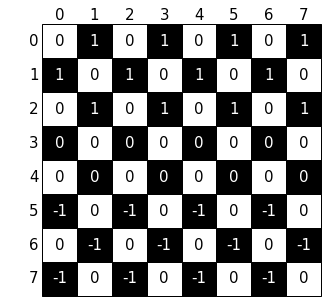

Press to play 

Play: 1 / Played by: White / Next player: Black
Last move: (9, 14)
# iterations: 1 -> True


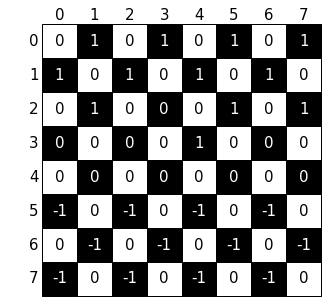

KeyboardInterrupt: Interrupted by user

In [18]:
game(action_space,state,counter) #test game